In [2]:
import matplotlib.pyplot as plt
import numpy as np
f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

Part a)

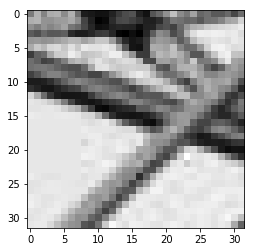

In [3]:
# load image
img = f[:32,:32]
plt.imshow(img, cmap="gray")

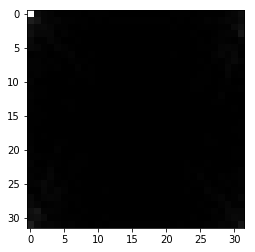

In [5]:
# 2d fft and plot
F = np.fft.fft2(img)
plt.imshow(np.abs(F), cmap='gray')

$F_{0,0}$ has the brightest value, it represents the average value of the 2D image

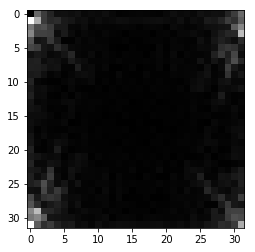

In [6]:
# zero out
F[0,0]= 0
plt.imshow(np.abs(F), cmap='gray')

Part b)

In [38]:
def Compress(X,tol):
    rows = len(X)//32
    cols = len(X[0])//32
    colStart = 0
    colEnd = 32
    originalNonZeros = 0
    droppedNonZeros = 0
    Y = np.zeros(shape=X.shape)
    for i in range(rows):
        rowStart  = i*32
        rowEnd = i*32+32
        colStart = 0
        colEnd = 32
        for j in range(cols):
            img = X[rowStart:rowEnd, colStart:colEnd]
            F = np.fft.fft2(img)
            Zeros = np.sum(F==0)
            originalNonZeros += np.sum(F!=0)
            tolerance = np.max(np.abs(F))*tol
            F[np.abs(F)<=tolerance] = 0
            droppedNonZeros += (np.sum(F==0) - Zeros)
            Finv = np.fft.ifft2(F)
            Y[rowStart:rowEnd, colStart:colEnd] = Finv.real
            colStart += 32
            colEnd += 32
    drop = droppedNonZeros/originalNonZeros
    return (Y, drop)

Part c)

In [39]:
res1, drop = Compress(f, 0.001)
drop

0.49357769786954336

Text(0.5, 1.0, 'tol=0.001, drop ratio = 0.5')

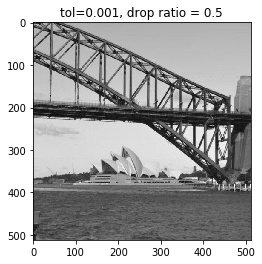

In [40]:
plt.imshow(res1, cmap='gray')
plt.title("tol=0.001, drop ratio = 0.5")

In [41]:
res2, drop = Compress(f, 0.004)
drop

0.7996945443297374

Text(0.5, 1.0, 'tol=0.004, drop ratio = 0.8')

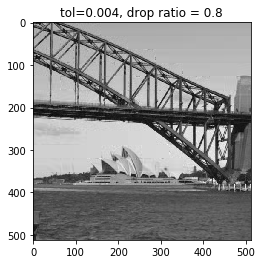

In [42]:
plt.imshow(res2, cmap='gray')
plt.title("tol=0.004, drop ratio = 0.8")

In [43]:
res3, drop = Compress(f, 0.0094)
drop

0.9201600742373275

Text(0.5, 1.0, 'tol=0.0094, drop ratio = 0.92')

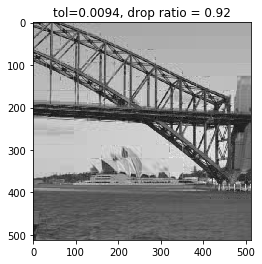

In [44]:
plt.imshow(res3, cmap='gray')
plt.title("tol=0.0094, drop ratio = 0.92")

In [51]:
res4, drop = Compress(f, 0.02)
drop

0.9699029501604609

Text(0.5, 1.0, 'tol=0.02, drop ratio = 0.97')

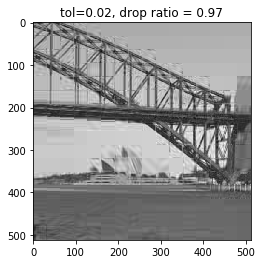

In [52]:
plt.imshow(res4, cmap='gray')
plt.title("tol=0.02, drop ratio = 0.97")

Text(0.5, 1.0, 'Error vs 50% drop')

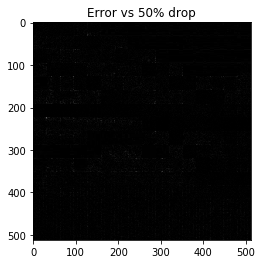

In [54]:
# error visualize with 50 % drop
plt.imshow(np.abs(res1 - f), cmap='gray')
plt.title("Error vs 50% drop")